In [15]:
#https://onlytojay.medium.com/mnist-cnn-optimizer-comparison-with-tensorflow-keras-163735862ecd
#https://keras.io/api/layers/convolution_layers/convolution2d/


In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9066 - accuracy: 0.8947 - val_loss: 0.1492 - val_accuracy: 0.9566
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1247 - accuracy: 0.9650 - val_loss: 0.1018 - val_accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.0767 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0616 - val_accuracy: 0.9817


In [19]:
#import os, time
#from tensorflow.keras.callbacks import TensorBoard

#tensorboard = TensorBoard(os.path.join('log_test4',f'{"Adam"}_{time.time()}'))
#model.fit(X_train, y_train, batch_size=32, epochs=5, callbacks=[tensorboard])

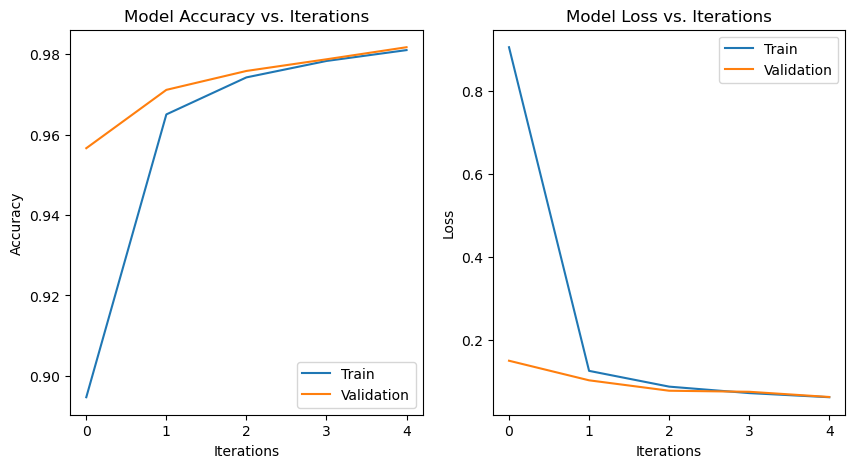

In [22]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()